<a href="https://colab.research.google.com/github/dileep98490/Machine-learning/blob/main/SVM_with_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We will use tensorflow to download the training data which is MNIST that contains hand-written digits from 0-9. Our goal is to recognize the handwritten digit belonging to any of the 10 classes(0-9)

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

from tensorflow import keras
from keras import layers
from sklearn import svm

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.99):
      print("\nReached 99% accuracy so cancelling training!")
      self.model.stop_training = True
print(tf.version)
callbacks = myCallback()
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
print('The length of data is',len(x_train))
x_train=x_train/255.0
x_test=x_test/255.0

# YOUR CODE SHOULD START HERE

# YOUR CODE SHOULD END HERE


<module 'tensorflow._api.v2.version' from '/usr/local/lib/python3.7/dist-packages/tensorflow/_api/v2/version/__init__.py'>
11501568/11490434 [==============================] - 0s 0us/step
The length of data is 60000


Reshape the training data so that we can feed to SVM classifier

In [ ]:
x_train_new=x_train.reshape(-1,784) #60000,784 also would have given same result, 60000x28x28
#print(x_train[0])
print(x_train_new.shape)
print(y_train.shape)


(60000, 784)
(60000,)


We will use the sci-kit svm for the purpose of training our model

In [ ]:
clf=svm.SVC(kernel='rbf')
clf.fit(x_train_new,y_train)

SVC()

Let's see the result using the test data

[9]
9


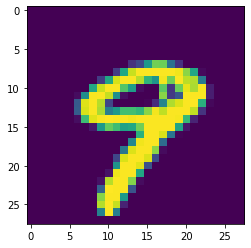

In [ ]:
i=9
p=x_test[i].flatten()
l=p.reshape(1,-1)
print(clf.predict(l))
plt.imshow(x_test[i])
print(y_test[i])

Let's see the prediction accuracy over full test data set

In [ ]:
x_test_new=x_test.reshape(-1,784)
clf.score(x_test_new,y_test)

0.9792

Neural Networks over Mnist data set

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2554 - accuracy: 0.9271
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1103 - accuracy: 0.9671
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0763 - accuracy: 0.9774
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0565 - accuracy: 0.9820
Epoch 5/5
313/313 [==============================] - 1s 1ms/step - loss: 0.0778 - accuracy: 0.9763
[3.68190278e-09 1.78761311e-05 9.99980807e-01 6.90125830e-07
 1.63386543e-13 2.44927385e-08 1.30792671e-07 1.07947017e-13
 5.05642618e-07 1.17802955e-11]
2


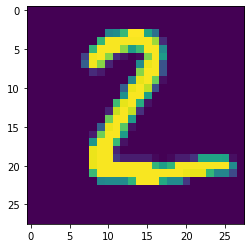

In [ ]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5, callbacks=[callbacks])
model.evaluate(x_test,y_test)
cf = model.predict(x_test)
print(cf[1])
print(y_test[1])
plt.imshow(x_test[1])
# YOUR CODE SHOULD START HERE
# YOUR CODE SHOULD END HERE